In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv(r'Visibility_weather_data.csv')
print(df.shape)
df.head()

(10000, 11)


,DATE,VISIBILITY,DRYBULBTEMPF,WETBULBTEMPF,DewPointTempF,RelativeHumidity,WindSpeed,WindDirection,StationPressure,SeaLevelPressure,Precip
0,01-01-2010 00:00,9.993428,80.0,68.0,NaN,7.0,4.626061,253.0,30.02,30.41,0.11
1,01-01-2010 01:00,8.723471,30.0,69.0,78.0,77.0,0.913084,179.0,29.48,30.03,0.13
2,01-01-2010 02:00,10.295377,NaN,2.0,41.0,43.0,10.303187,7.0,29.87,30.24,0.08
3,01-01-2010 03:00,12.046060,NaN,48.0,44.0,70.0,17.072654,188.0,29.99,30.05,0.07
4,01-01-2010 04:00,8.531693,37.0,NaN,-18.0,77.0,9.176510,34.0,29.57,30.13,0.15


DATA CLEANING:
- Handling Missing Values
- Handling Duplicates
- Checking Data Type
- Understanding the Dataset

In [6]:
features_with_na= [features for features in df.columns if df[features].isnull().sum()>=1]
print("Features with null values are : ", features_with_na )
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(),4),  ' % of missing values')

Features with null values are :  ['VISIBILITY', 'DRYBULBTEMPF', 'WETBULBTEMPF', 'DewPointTempF', 'RelativeHumidity', 'WindSpeed', 'WindDirection', 'StationPressure', 'SeaLevelPressure', 'Precip']
VISIBILITY 0.02  % of missing values
DRYBULBTEMPF 0.02  % of missing values
WETBULBTEMPF 0.02  % of missing values
DewPointTempF 0.02  % of missing values
RelativeHumidity 0.02  % of missing values
WindSpeed 0.02  % of missing values
WindDirection 0.02  % of missing values
StationPressure 0.02  % of missing values
SeaLevelPressure 0.02  % of missing values
Precip 0.02  % of missing values


In [7]:
df['DATE']=pd.to_datetime(df['DATE'], format='%d-%m-%Y %H:%M')
df.fillna(df.median(), inplace=True)
df.isnull().sum().sum()

np.int64(0)

In [8]:
df.duplicated().sum()

np.int64(0)

DROP THE COLUMNS WHICH WE COULD SEE IN THE EDA NOTEBOOK ARE NOT EITHER IMPORTANT OR HAVING HIGH CORRELATION

In [9]:
columns_to_drop=['WETBULBTEMPF', 'DewPointTempF', 'StationPressure', 'DATE', 'Precip']
df= df.drop(columns=columns_to_drop,axis=1)

In [10]:
df.head()

,VISIBILITY,DRYBULBTEMPF,RelativeHumidity,WindSpeed,WindDirection,SeaLevelPressure
0,9.993428,80.0,7.0,4.626061,253.0,30.41
1,8.723471,30.0,77.0,0.913084,179.0,30.03
2,10.295377,53.0,43.0,10.303187,7.0,30.24
3,12.046060,53.0,70.0,17.072654,188.0,30.05
4,8.531693,37.0,77.0,9.176510,34.0,30.13


### **FEATURE ENGINEERING**

#### Numeric Features

In [11]:
num_features=[feature for feature in df.columns if df[feature].dtype !='O']
print("Number of numerical features: ", len(num_features))

Number of numerical features:  6


#### Continues Features

In [21]:
continuous_features=[feature for feature in num_features if len(df[feature].unique())>25]
print("Number of continuous features: ", len(continuous_features))

Number of continuous features:  6


### **OUTLIER DETECTION**
Outlier are due to:
- Data Entry error: Human error
- Measurement error: Instrument error
- Natural error: Error in real life data
- Intentional error: People giving false information

Impact of Outliers:
- Outliers can have very high impact on few machine learning models.
- Can cause bias in the output.

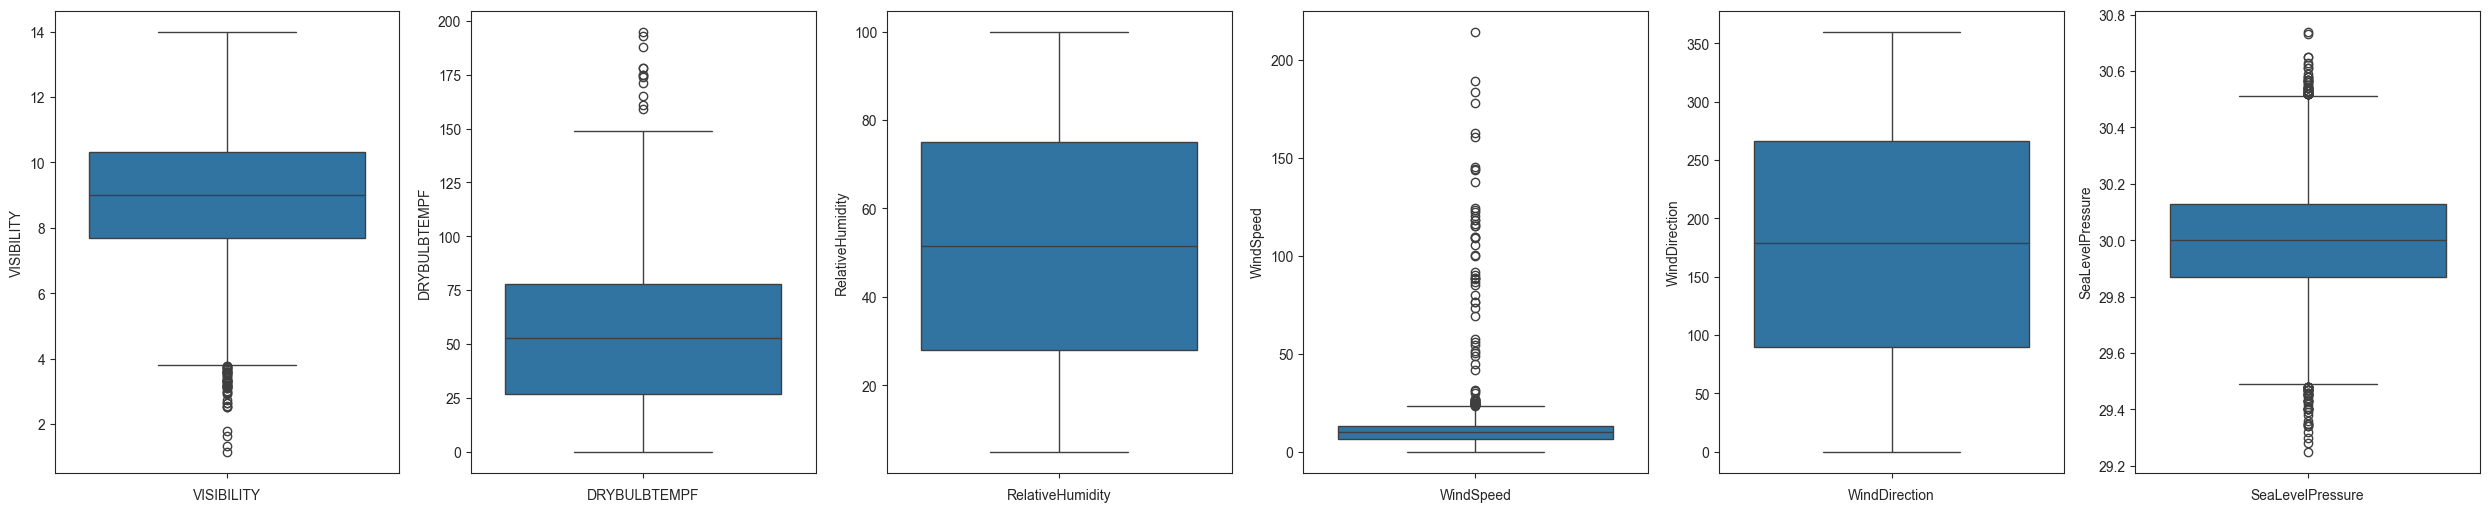

In [24]:
plt.figure(figsize=(25,10))
for i in range(len(continuous_features)):
    plt.subplot(2,6,i+1)
    sns.set_style('ticks')
    plt.xlabel(continuous_features[i])
    sns.boxplot(df[continuous_features[i]])
    plt.tight_layout()

**REPORT**
- We can see, there are no such outliers in RelativeHumidity, and WindDirection columns.
- But there are outliers in WindSpeed, SeaLevelPressure, DRYBULBTEMPF, VISIBILITY columns.

In [35]:
#OUTLIER DETECTION AND TREATMENT USING IQR METHOD
def detect_outliers(col):
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    print('\n   ', col , '  ')
    print("Q1: ", q1)
    print("Q3: ", q3)
    iqr=q3-q1
    upper_limit=q3+1.5*iqr
    lower_limit=q1-1.5*iqr
    print("Upper limit: ", upper_limit)
    print("Lower limit: ", lower_limit)
    outlier=df[(df[col]>upper_limit) | (df[col]<lower_limit)]
    df.loc[(df[col]>upper_limit),col]=upper_limit
    df.loc[(df[col]<lower_limit),col]=lower_limit
    return df


for col in continuous_features:
    detect_outliers(col)


    VISIBILITY   
Q1:  7.6929660865
Q3:  10.3074012975
Upper limit:  14.229054114
Lower limit:  3.7713132700000003

    DRYBULBTEMPF   
Q1:  27.0
Q3:  78.0
Upper limit:  154.5
Lower limit:  -49.5

    RelativeHumidity   
Q1:  28.0
Q3:  75.0
Upper limit:  145.5
Lower limit:  -42.5

    WindSpeed   
Q1:  6.6318898829999995
Q3:  13.3648626125
Upper limit:  23.46432170675
Lower limit:  -3.4675692112500016

    WindDirection   
Q1:  90.0
Q3:  266.0
Upper limit:  530.0
Lower limit:  -174.0

    SeaLevelPressure   
Q1:  29.87
Q3:  30.13
Upper limit:  30.519999999999996
Lower limit:  29.480000000000004


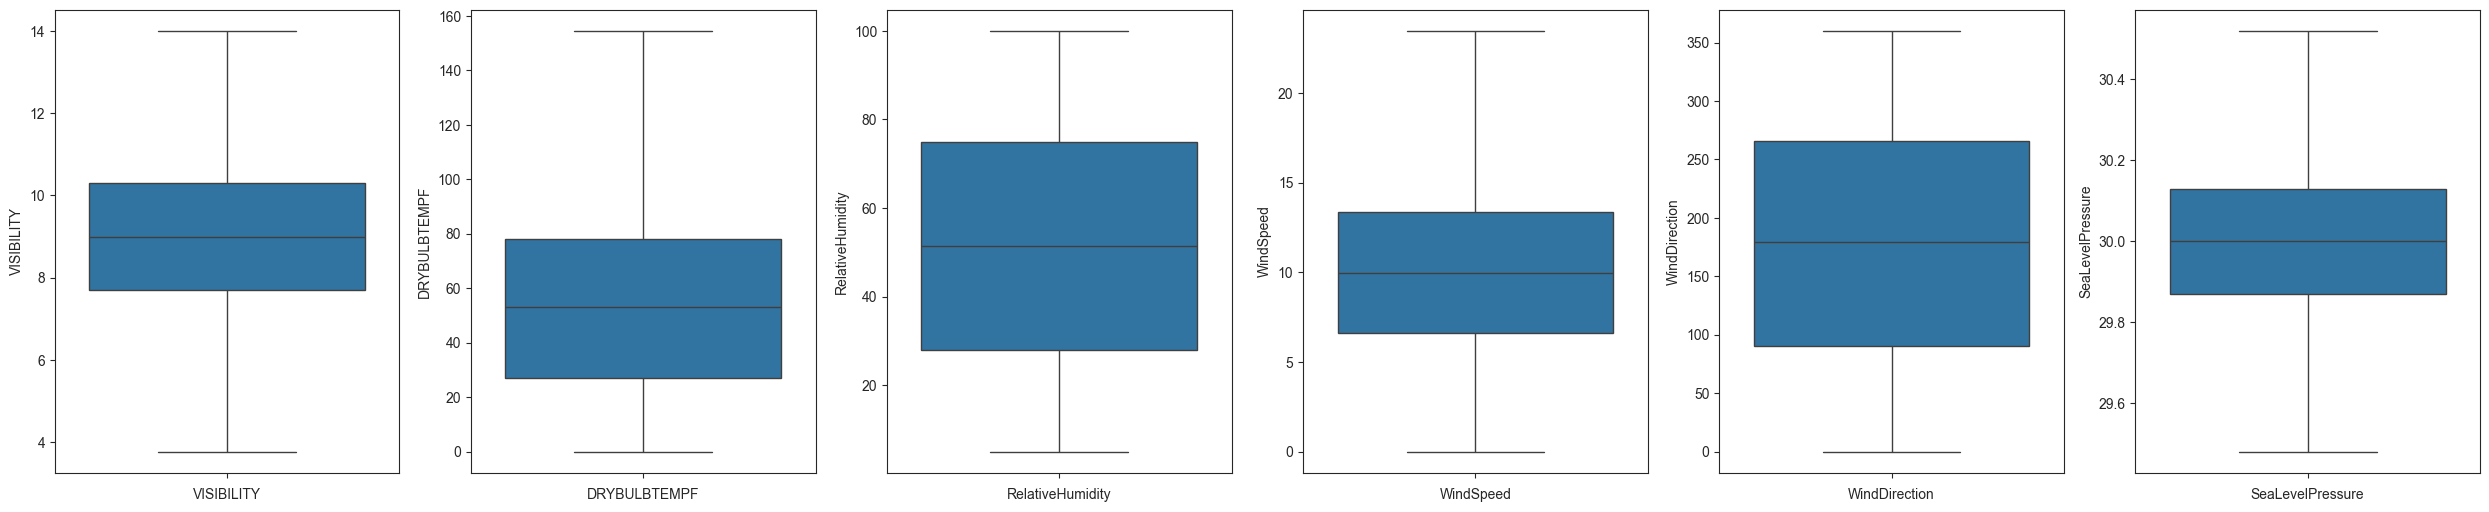

In [36]:
plt.figure(figsize=(25,10))
for i in range(len(continuous_features)):
    plt.subplot(2,6,i+1)
    sns.set_style('ticks')
    plt.xlabel(continuous_features[i])
    sns.boxplot(df[continuous_features[i]])
    plt.tight_layout()

**Why capping the outliers and not trimming it?**
- Trimming outliers may result in the removal of a large number of records from this dataset, as we already have very less rows so this isn't desirable in this case since columns other than the ones containing outlier values may contain useful information.
- In this case, we can use outlier capping to replace the outlier values with a maximum or minimum capped values. This manipulates our data but we can replace outlier values by the upper and lower limit calculated using the IQR range.

**Checking Skewness after Outlier Capping**

In [37]:
df[continuous_features].skew(axis=0, skipna=True)

VISIBILITY         -0.010929
DRYBULBTEMPF        0.037636
RelativeHumidity    0.032242
WindSpeed           0.224115
WindDirection       0.012320
SeaLevelPressure   -0.012234
dtype: float64